In [1]:
!pip install catboost

     |████████████████████████████████| 64.8MB 45kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
data = '/content/drive/My Drive/Google_Colab/Reverb_Sold_Synth/cleaned_data_eda.csv'

df = pd.read_csv(data)
df.drop(['Unnamed: 0', 'urls'], axis=1, inplace=True)
df['Brand'] = df['Brand'].apply(lambda x: x.lower())
df['Model'] = df['Model'].apply(lambda x: x.lower())
df.head()

,Brand,Condition,Description,Model,synth_types,Price,year_made,made_in,n_keys
0,roland,Excellent,a previous owner added some custom knobs - see...,boutique series se-02 analog synthesizer,Analog Synths,285.0,2010s,NaN,0
1,moog,Very Good,Unit is in great condition. A couple of blemis...,sub 37 tribute edition,Analog Synths,975.0,2010s,United States,37 Keys
2,4ms,Mint,4MS POD 48X (Powered Case) plus POWER BRICK Th...,pod 48x powered,Eurorack,155.0,2010s,NaN,0
3,dreadbox,Mint,Dreadbox Hades Bass Synthesizer Outstanding s...,hades bass synthesizer,Analog Synths,560.0,2010s,Greece,0
4,m-audio,Very Good,Getting rid of some things because times are t...,axiom 49 key usb midi keyboard controller,Controllers,55.0,2010s,NaN,49 Keys


In [5]:
import re
def synth_type_identifier(row):

    for synth_type in df.synth_types.unique():
        if re.search(str(synth_type).lower(), str(row).lower()):
            return synth_type
        else:
            pass

In [6]:
df['synth_types'].fillna(df['Description'].apply(synth_type_identifier), inplace=True)

In [7]:
df.dropna(subset=['synth_types'], inplace=True)

df.drop(['Description', 'made_in', 'year_made'], axis=1, inplace=True)

In [8]:
X = df.drop('Price', axis=1)
y = df['Price']

In [9]:
df.isna().sum()

Brand          0
Condition      0
Model          0
synth_types    0
Price          0
n_keys         0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
cat_indices = np.where(X.dtypes != np.float)[0]

In [29]:
model = CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train, cat_features=cat_indices, plot=True, eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 490.5080382	test: 452.3244245	best: 452.3244245 (0)	total: 14.2ms	remaining: 693ms
1:	learn: 478.2089144	test: 439.4899401	best: 439.4899401 (1)	total: 15.7ms	remaining: 377ms
2:	learn: 469.6193572	test: 430.4027112	best: 430.4027112 (2)	total: 17.3ms	remaining: 272ms
3:	learn: 461.7477766	test: 421.3170143	best: 421.3170143 (3)	total: 18.3ms	remaining: 211ms
4:	learn: 455.5766084	test: 415.5737639	best: 415.5737639 (4)	total: 19.2ms	remaining: 173ms
5:	learn: 449.6221059	test: 410.3356297	best: 410.3356297 (5)	total: 20.2ms	remaining: 148ms
6:	learn: 443.9333897	test: 404.2777555	best: 404.2777555 (6)	total: 21.3ms	remaining: 131ms
7:	learn: 440.4741487	test: 400.9050033	best: 400.9050033 (7)	total: 22.2ms	remaining: 117ms
8:	learn: 436.9718056	test: 397.0429876	best: 397.0429876 (8)	total: 23.1ms	remaining: 105ms
9:	learn: 433.8482336	test: 394.2788016	best: 394.2788016 (9)	total: 24.2ms	remaining: 96.7ms
10:	learn: 431.2332730	test: 391.6902371	best: 391.6902371 (10)	total

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
print('MSE: %0.2f' % (mean_squared_error(y_test, y_pred)))
print('RMSE: %0.2f' % (np.sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: %0.2f' % (mean_absolute_error(y_test, y_pred)))

MSE: 132343.78
RMSE: 363.79
MAE: 180.52


In [36]:
r_squared = model.score(X_test, y_test)
print('R-Squared: %0.4f' % (r_squared))
print('Adjusted R-Squared: %0.4f' % (1 - ((1 - r_squared * (len(df)) /((len(df) - len(df.columns) - 1))))))

R-Squared: 0.3841
Adjusted R-Squared: 0.3849


## Testing Different Models

In [23]:
from sklearn.model_selection import GridSearchCV

params = {'iterations': [50, 100, 150, 200, 250, 300],
          'depth': [1, 2, 3, 4],
          'learning_rate': [0.001, 0.01, 0.1, 0.5]}

model = CatBoostRegressor(loss_function='RMSE')

grid_search = GridSearchCV(estimator=model, param_grid=params)

grid_search.fit(X_train, y_train, cat_features=cat_indices, eval_set=(X_test, y_test))

print(grid_search.best_params_)

print(grid_search.best_score_)

Streaming output truncated to the last 5000 lines.
82:	learn: 491.2405931	test: 453.0285954	best: 453.0285954 (82)	total: 136ms	remaining: 355ms
83:	learn: 491.1122792	test: 452.8859290	best: 452.8859290 (83)	total: 137ms	remaining: 353ms
84:	learn: 490.9809533	test: 452.7503154	best: 452.7503154 (84)	total: 139ms	remaining: 351ms
85:	learn: 490.8408509	test: 452.5967264	best: 452.5967264 (85)	total: 140ms	remaining: 349ms
86:	learn: 490.7078792	test: 452.4634644	best: 452.4634644 (86)	total: 142ms	remaining: 347ms
87:	learn: 490.5800030	test: 452.3201127	best: 452.3201127 (87)	total: 143ms	remaining: 345ms
88:	learn: 490.4618641	test: 452.1878147	best: 452.1878147 (88)	total: 145ms	remaining: 344ms
89:	learn: 490.3561841	test: 452.0873591	best: 452.0873591 (89)	total: 147ms	remaining: 342ms
90:	learn: 490.2233170	test: 451.9564070	best: 451.9564070 (90)	total: 148ms	remaining: 340ms
91:	learn: 490.1056582	test: 451.8658744	best: 451.8658744 (91)	total: 150ms	remaining: 338ms
92:	learn

In [24]:
print(grid_search.best_params_)

print(grid_search.best_score_)

{'depth': 4, 'iterations': 200, 'learning_rate': 0.1}
0.43698134813898004


In [37]:
final_model = CatBoostRegressor(iterations=200, depth=4, learning_rate=0.1, loss_function='RMSE')
final_model.fit(X_train, y_train, cat_features=cat_indices, plot=True, eval_set=(X_test, y_test),
                verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [55]:
prediction = final_model.predict(X_test)

r_squared = final_model.score(X_test, y_test)
print('R-Squared: %0.4f' % (r_squared))
print('Adjusted R-Squared: %0.4f' % (1 - ((1 - r_squared * (len(df)) /((len(X) - len(X.columns) - 1))))))

R-Squared: 0.4197
Adjusted R-Squared: 0.4205


In [40]:
print('MSE: %0.2f' % (mean_squared_error(y_test, prediction)))
print('RMSE: %0.2f' % (np.sqrt(mean_squared_error(y_test, prediction))))
print('MAE: %0.2f' % (mean_absolute_error(y_test, prediction)))

MSE: 124702.19
RMSE: 353.13
MAE: 171.20


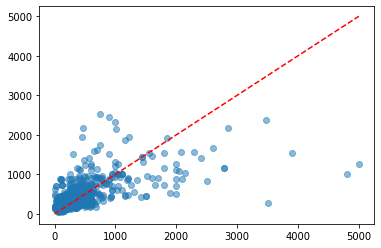

In [44]:
plt.scatter(y_test, prediction, alpha=0.5)
plt.plot(range(5000), range(5000), c='red', ls='--')

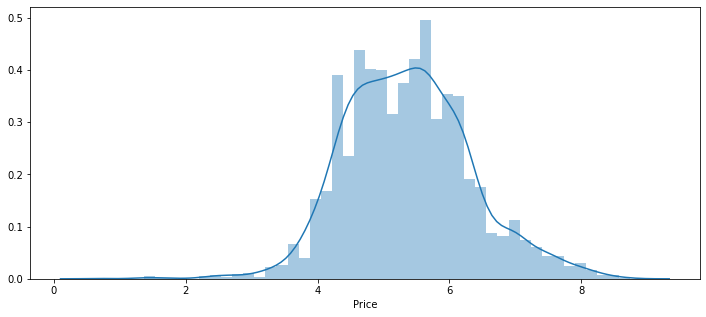

In [49]:
plt.figure(figsize=(12, 5))
sns.distplot(np.log(df['Price']))

In [50]:
y_2 = np.log(df['Price'])

In [51]:
X_train, X_test, y_train_2, y_test_2 = train_test_split(X, y_2, test_size=0.3, random_state=101)

In [53]:
params = {'iterations': [50, 100, 150, 200, 250, 300],
          'depth': [1, 2, 3, 4],
          'learning_rate': [0.001, 0.01, 0.1, 0.5]}

model = CatBoostRegressor(loss_function='RMSE')

grid_search = GridSearchCV(estimator=model, param_grid=params)

grid_search.fit(X_train, y_train_2, cat_features=cat_indices, eval_set=(X_test, y_test_2),
                verbose=False)

print(grid_search.best_params_)

print(grid_search.best_score_)

{'depth': 3, 'iterations': 200, 'learning_rate': 0.5}
0.5759752253004575


In [58]:
log_model = CatBoostRegressor(iterations=200, depth=3, learning_rate=0.5,
                                  loss_function='RMSE')

log_model.fit(X_train, y_train_2, cat_features=cat_indices, eval_set=(X_test, y_test_2),
              verbose=False, plot=True) 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [61]:
r_squared = log_model.score(X_test, y_test_2)
print('R-Squared: %0.4f' % (r_squared))
print('Adjusted R-Squared: %0.4f' % (1 - ((1 - r_squared) * len(df) / (len(df) - len(X.columns) - 1))))

R-Squared: 0.5596
Adjusted R-Squared: 0.5588


In [63]:
y_log_pred = log_model.predict(X_test)
y_log_pred = np.exp(y_log_pred)

In [64]:
print('MSE: %0.2f' % (mean_squared_error(y_test, y_log_pred)))
print('RMSE: %0.2f' % (np.sqrt(mean_squared_error(y_test, y_log_pred))))
print('MAE: %0.2f' % (mean_absolute_error(y_test, y_log_pred)))

MSE: 157832.01
RMSE: 397.28
MAE: 155.24


In [78]:
feat_imp = [z for z in zip(X.columns, log_model.get_feature_importance())]
feat_imp = pd.DataFrame(feat_imp, columns=['Features', 'Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Features,Importance
3,synth_types,31.768479
0,Brand,29.342722
4,n_keys,19.090352
2,Model,13.161576
1,Condition,6.636871


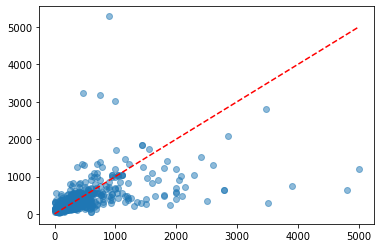

In [80]:
plt.scatter(y_test, y_log_pred, alpha=0.5)
plt.plot(range(5000), range(5000), c='red', ls='--')

In [83]:
import pickle
pickle.dump(log_model, open('log_model.pkl', 'wb'))